In [23]:
import pandas as pd

### Read the Players File

In [24]:
players_df = pd.read_csv("./Players.csv", delimiter=';')
players_df.head()

,PLAYER_ID,FIRST_NAME,LAST_NAME,NATIONALITY,DOB,TEAM,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FOOT
0,ply510,NaN,Danilo,Brazil,7/15/1991,Juventus,6.0,Defender,184.0,78.0,R
1,ply511,Mattia De,Sciglio,Italy,10/20/1992,Juventus,2.0,Defender,182.0,78.0,R
2,ply512,Federico,Gatti,Italy,6/24/1998,Juventus,15.0,Defender,190.0,84.0,R
3,ply513,Daniele,Rugani,Italy,7/29/1994,Juventus,24.0,Defender,190.0,84.0,R
4,ply514,Enzo,Barrenechea,Argentina,5/22/2001,Juventus,45.0,Midfielder,186.0,81.0,L


We do not care about the date of birth and the jersey numbers in this analysis so we can drop those columns

In [25]:
players_df.drop(['DOB', 'JERSEY_NUMBER'], axis=1, inplace=True)
players_df.head()

,PLAYER_ID,FIRST_NAME,LAST_NAME,NATIONALITY,TEAM,POSITION,HEIGHT,WEIGHT,FOOT
0,ply510,NaN,Danilo,Brazil,Juventus,Defender,184.0,78.0,R
1,ply511,Mattia De,Sciglio,Italy,Juventus,Defender,182.0,78.0,R
2,ply512,Federico,Gatti,Italy,Juventus,Defender,190.0,84.0,R
3,ply513,Daniele,Rugani,Italy,Juventus,Defender,190.0,84.0,R
4,ply514,Enzo,Barrenechea,Argentina,Juventus,Midfielder,186.0,81.0,L


### Read the Matches File

In [26]:
matches_df = pd.read_csv("./Matches.csv", delimiter=';')
matches_df.head()

,MATCH_ID,SEASON,DATE_TIME,HOME_TEAM,AWAY_TEAM,STADIUM,HOME_TEAM_SCORE,AWAY_TEAM_SCORE,PENALTY_SHOOT_OUT,ATTENDANCE
0,mt1,2021-2022,15-SEP-21 08.00.00.000000000 PM,Manchester City,RB Leipzig,Etihad Stadium,6,3,0,38062
1,mt2,2021-2022,15-SEP-21 08.00.00.000000000 PM,Club Brugge KV,Paris Saint-Germain,Jan Breydel Stadion,1,1,0,27546
2,mt3,2021-2022,28-SEP-21 08.00.00.000000000 PM,Paris Saint-Germain,Manchester City,Parc des Princes,2,0,0,37350
3,mt4,2021-2022,28-SEP-21 08.00.00.000000000 PM,RB Leipzig,Club Brugge KV,Red Bull Arena,1,2,0,23500
4,mt5,2021-2022,19-OCT-21 05.45.00.000000000 PM,Club Brugge KV,Manchester City,Jan Breydel Stadion,1,5,0,24915


In [27]:
matches_df.describe()

,HOME_TEAM_SCORE,AWAY_TEAM_SCORE,PENALTY_SHOOT_OUT,ATTENDANCE
count,744.000000,744.000000,744.0,744.000000
mean,1.681452,1.381720,0.0,35786.936828
std,1.465394,1.345743,0.0,24000.039185
min,0.000000,0.000000,0.0,0.000000
25%,1.000000,0.000000,0.0,16592.500000
50%,1.000000,1.000000,0.0,38083.500000
75%,2.250000,2.000000,0.0,52258.750000
max,8.000000,8.000000,0.0,98299.000000


We can conclude the following from this data:
- The attendance does not affect the results as all of the available matches gather a lot of audience. Players stress due to the audience is therefore not quantifiable and can be ommitted.
- The home team is at an advantage given the mean values. This can help with predictions in the future.

In [28]:
matches_df.drop(['ATTENDANCE'], axis=1, inplace=True)
matches_df.head()

,MATCH_ID,SEASON,DATE_TIME,HOME_TEAM,AWAY_TEAM,STADIUM,HOME_TEAM_SCORE,AWAY_TEAM_SCORE,PENALTY_SHOOT_OUT
0,mt1,2021-2022,15-SEP-21 08.00.00.000000000 PM,Manchester City,RB Leipzig,Etihad Stadium,6,3,0
1,mt2,2021-2022,15-SEP-21 08.00.00.000000000 PM,Club Brugge KV,Paris Saint-Germain,Jan Breydel Stadion,1,1,0
2,mt3,2021-2022,28-SEP-21 08.00.00.000000000 PM,Paris Saint-Germain,Manchester City,Parc des Princes,2,0,0
3,mt4,2021-2022,28-SEP-21 08.00.00.000000000 PM,RB Leipzig,Club Brugge KV,Red Bull Arena,1,2,0
4,mt5,2021-2022,19-OCT-21 05.45.00.000000000 PM,Club Brugge KV,Manchester City,Jan Breydel Stadion,1,5,0


### Read Teams File

In [29]:
teams_df = pd.read_csv("./Teams.csv", delimiter=';')
teams_df.head()

,TEAM_NAME,COUNTRY,HOME_STADIUM
0,AC Milan,Italy,Giuseppe Meazza
1,AFC Ajax,Netherlands,Johan Cruijff ArenA
2,Atalanta,Italy,Gewiss Stadium
3,Atlético Madrid,Spain,Wanda Metropolitano
4,Bayern München,Germany,Allianz Arena


### Read the Goals File

In [30]:
goals_df = pd.read_csv("./Goals.csv", delimiter=';')
goals_df.head()

,GOAL_ID,MATCH_ID,PID,DURATION,ASSIST,GOAL_DESC
0,gl470,mt154,ply1479,4,ply864,right-footed shot
1,gl471,mt154,ply1075,28,ply864,penalty
2,gl472,mt154,ply585,69,ply864,right-footed shot
3,gl473,mt155,ply396,12,ply653,right-footed shot
4,gl474,mt155,ply1064,81,ply653,right-footed shot


In [31]:
goals_df.describe(include=["object"])

,GOAL_ID,MATCH_ID,PID,ASSIST,GOAL_DESC
count,2279,2279,2176,1605,2263
unique,2279,702,666,594,9
top,gl470,mt688,ply398,ply741,right-footed shot
freq,1,12,54,24,956


### Perform Analytics on Best Goal Scorers

Clean the data

In [32]:
print(players_df.shape)
players_df.dropna(inplace=True)
print(players_df.shape)

(2769, 9)
(1656, 9)


Rank player by most goals scored

In [33]:
players_ranking = goals_df["PID"].value_counts(ascending=False)
players_ranking

PID
ply398     54
ply699     47
ply740     42
ply831     40
ply739     33
           ..
ply1854     1
ply1071     1
ply1478     1
ply479      1
ply2769     1
Name: count, Length: 666, dtype: int64

Transform the list of ranked IDs into a data frame

In [34]:
players_ranking = players_ranking.index.to_frame()
players_ranking

,PID
PID,
ply398,ply398
ply699,ply699
ply740,ply740
ply831,ply831
ply739,ply739
...,...
ply1854,ply1854
ply1071,ply1071
ply1478,ply1478


In [35]:
# Prepare the data frames for merging
players_ranking.reset_index(drop = True, inplace = True)
players_df.rename(columns={'PLAYER_ID':'PID'}, inplace=True)

# Merge according to Player ID
merged_df = pd.merge(players_ranking, players_df, on='PID', how='left')
merged_df.dropna(inplace=True)
merged_df.head(40)

,PID,FIRST_NAME,LAST_NAME,NATIONALITY,TEAM,POSITION,HEIGHT,WEIGHT,FOOT
0,ply398,Robert,Lewandowski,Poland,FC Barcelona,Forward,185.0,81.0,R
2,ply740,Lionel,Messi,Argentina,Paris Saint-Germain,Forward,170.0,72.0,L
3,ply831,Karim,Benzema,France,Real Madrid,Forward,185.0,81.0,R
4,ply739,Kylian,Mbappé,France,Paris Saint-Germain,Forward,178.0,73.0,R
5,ply590,Mo,Salah,Egypt,Liverpool FC,Forward,175.0,73.0,L
7,ply142,Sadio,Mané,Senegal,Bayern München,Forward,174.0,69.0,R
8,ply662,Erling,Haaland,Norway,Manchester City,Forward,194.0,88.0,L
9,ply293,Raheem,Sterling,England,Chelsea FC,Forward,170.0,69.0,R
10,ply589,Roberto,Firmino,Brazil,Liverpool FC,Forward,181.0,76.0,R
11,ply1801,Harry,Kane,England,Tottenham Hotspur,Forward,188.0,86.0,R


In [36]:
merged_df.dtypes

PID             object
FIRST_NAME      object
LAST_NAME       object
NATIONALITY     object
TEAM            object
POSITION        object
HEIGHT         float64
WEIGHT         float64
FOOT            object
dtype: object

In [37]:
merged_df.describe(include=[object])

,PID,FIRST_NAME,LAST_NAME,NATIONALITY,TEAM,POSITION,FOOT
count,326,326,326,326,326,326,326
unique,326,286,314,55,64,5,2
top,ply398,Thomas,Silva,France,Liverpool FC,Forward,R
freq,1,4,3,34,15,122,243


### Data Visualisation

<Axes: xlabel='POSITION'>

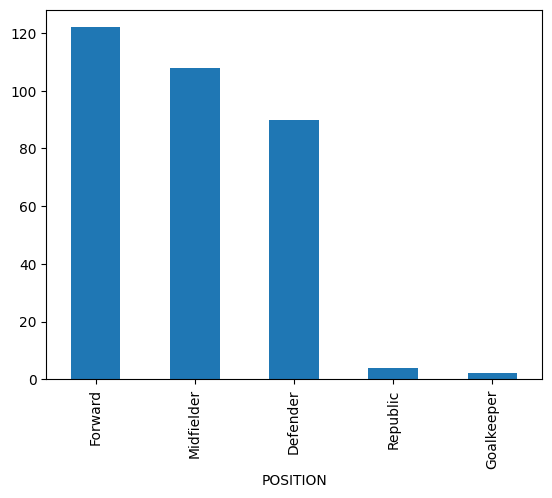

In [38]:
merged_df.POSITION.value_counts().plot(kind='bar')